# Distinguish the species based on Iris flower dataset
<img src="images/iris_types.jpg">

## Table of Contents

1. [Introduction](#Section1)
2. [Goals](#Section2)
3. [Importing libraries](#Section3)    
4. [Data Loading and data Description](#Section4)    
5. [Data Understanding and Exploration](#Section5)        
6. [Metrics for Evaluating Machine Learning Algorithms](#Section6)
7. [Label Encoding](#Section7)
8. [Standard Scaler](#Section8)
9.  [Dimensionality Reduction](#Section9)
10. [Splitting the dataset into the Training set and Test set](#Section10)
11. [Building the Model - Support Vector Machine](#Section11)
    - 11.1 [Using Linear Kernel](#Section111)
    - 11.2 [Using Polynomial kernel](#Section112)
    - 11.3 [Using RBF Kernel](#Section113)
    - 11.4 [Using Sigmoid Kernel](#Section114)
12. [Accuracy of SVC classfication with different kernels](#Section12)

<a id = Section1></a>
## 1. Introduction 

This is perhaps the best known database to be found in the pattern recognition literature. Fisher's paper is a classic in the field and is referenced frequently to this day. (See Duda & Hart, for example.) The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other. 

Predicted attribute: class of iris plant. 

This is an exceedingly simple domain. 

This data differs from the data presented in Fishers article (identified by Steve Chadwick, spchadwick '@' espeedaz.net).

- The 35th sample should be: 4.9,3.1,1.5,0.2,"Iris-setosa" where the error is in the fourth feature.
- The 38th sample: 4.9,3.6,1.4,0.1,"Iris-setosa" where the errors are in the second and third features.

<a id = Section2></a>
## 2. Goals

The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). 

Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. Based on the combination of these four features, We developed a some discriminant model to distinguish the species from each other.

<a id = Section3></a>
## 3. Importing libraries

Python modules can get access to code from another module by importing the file/function using import.

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

<a id = Section4></a>
## 4. Data Loading and data Description

In [2]:
# Importing the dataset
dataset = pd.read_csv('Iris.csv')

##Looking at data types
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [3]:
dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


<a id = Section5></a>
## 5. Data Understanding and Exploration

In [4]:
#looking at the first 5 values of the dataset
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
dataset=dataset.drop(columns=['Id'])
dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
dataset['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

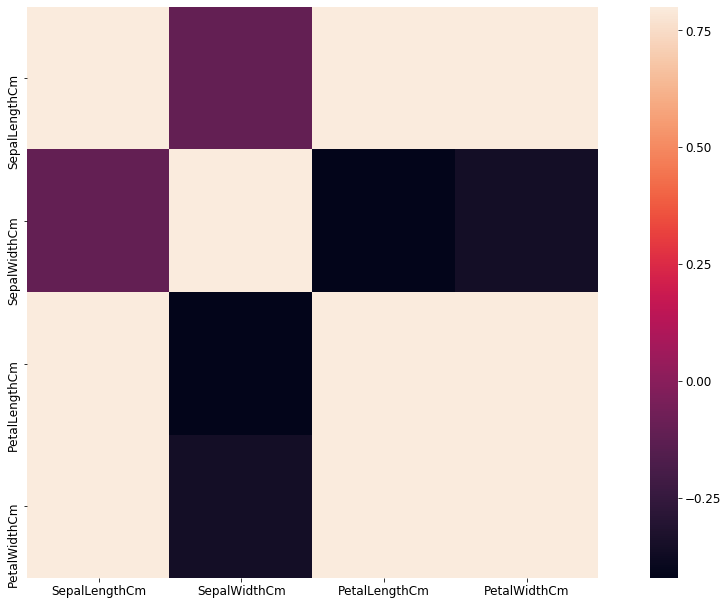

In [8]:
params = {'legend.fontsize': 'large',
          'figure.figsize': (18.5, 10.5),
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large'}
plt.rcParams.update(params)

#correlation matrix
corrmat = dataset.corr()
sns.heatmap(corrmat, vmax=.8, square=True);

In [9]:
cor = dataset.corr(method ='kendall')
cor

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.072112,0.717624,0.654960
SepalWidthCm,-0.072112,1.000000,-0.182391,-0.146988
PetalLengthCm,0.717624,-0.182391,1.000000,0.803014
PetalWidthCm,0.654960,-0.146988,0.803014,1.000000


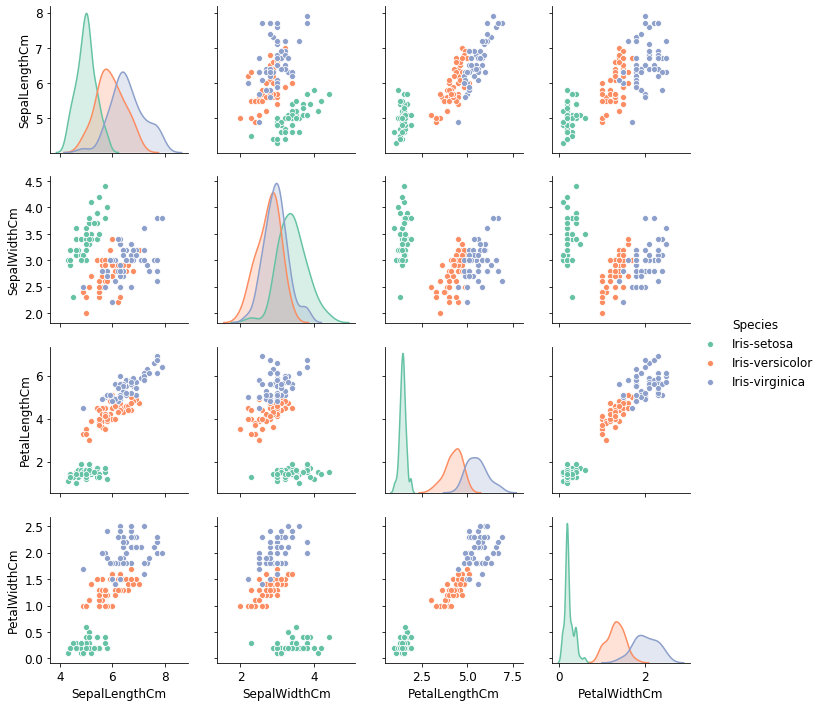

In [10]:
# Creating a pairplot to visualize the similarities and especially difference between the species
sns.pairplot(data=dataset, hue='Species', palette='Set2')

## 6. Metrics for Evaluating Machine Learning Algorithms
<a id = Section6></a>

Different performance metrics are used to evaluate different Machine Learning Algorithms. Here we have used __Classification Metrics__.

### Classification Metrics
Classification model predict the class labels for given input data. In binary and multi-class classification, we have two output classes and more than two output classes, respectively.

Several methods could be used to measure the performance of the classification model. Some of them are log-loss, AUC, confusion matrix, and precision-recall.

__Here we have used confusion matrix, classification report.__

### Classification Report
A Classification report is used to measure the quality of predictions from a classification algorithm. How many predictions are True and how many are False. More specifically, True Positives, False Positives, True negatives and False Negatives are used to predict the metrics of a classification report of a classification report as shown below.

<img src="images/classification_report.png">

The report shows the main classification metrics precision, recall and f1-score on a per-class basis. The metrics are calculated by using true and false positives, true and false negatives. Positive and negative in this case are generic names for the predicted classes. There are four ways to check if the predictions are right or wrong:

- __TN / True Negative:__ when a case was negative and predicted negative
- __TP / True Positive:__ when a case was positive and predicted positive
- __FN / False Negative:__ when a case was positive but predicted negative
- __FP / False Positive:__ when a case was negative but predicted positive

#### Precision – What percent of your predictions were correct?
Precision is the ability of a classifier not to label an instance positive that is actually negative. For each class it is defined as the ratio of true positives to the sum of true and false positives.

1. __TP – True Positives__
2. __FP – False Positives__

Precision – Accuracy of positive predictions.

Precision = TP/(TP + FP)

#### Recall – What percent of the positive cases did you catch? 
Recall is the ability of a classifier to find all positive instances. For each class it is defined as the ratio of true positives to the sum of true positives and false negatives.

__FN – False Negatives__

Recall: Fraction of positives that were correctly identified.<br/>
Recall = TP/(TP+FN)

#### F1 score – What percent of positive predictions were correct?

The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. Generally speaking, F1 scores are lower than accuracy measures as they embed precision and recall into their computation. As a rule of thumb, the weighted average of F1 should be used to compare classifier models, not global accuracy.

F1 Score = 2*(Recall * Precision) / (Recall + Precision)

#### Confusion Matrix:
A confusion matrix is a summary of prediction results on a classification problem. The number of correct and incorrect predictions are summarized with count values and broken down by each class. This is the key to the confusion matrix. The confusion matrix shows the ways in which your classification model is confused when it makes predictions. It gives us insight not only into the errors being made by a classifier but more importantly the types of errors that are being made.
<img src="images/Confusion_Matrix.png">

#### Classification Rate/Accuracy:
Classification Rate or Accuracy is given by the relation:
<img src="images/Accuracy.png">

In [11]:
def comparision(y_test, y_pred):
    print('See the the below actual and predicted value side by side,')
    print('actual value on the left side and predicted value on the right hand side.')
    print()
    print('Printing the top 5 values:')
    print()
    y_compare = np.vstack((y_test, y_pred)).T
    print(y_compare[:5,:])
    
def confusion_matrix_with_report(y_test, y_pred):
    # Importing the classification report and confusion matrix
    from sklearn.metrics import classification_report, confusion_matrix

    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    print()
    print()
    print(classification_report(y_test, y_pred))

    #finding accuracy from the confusion matrix.
    a = cm.shape
    corrPred = 0
    falsePred = 0

    for row in range(a[0]):
        for c in range(a[1]):
            if row == c:
                corrPred +=cm[row,c]
            else:
                falsePred += cm[row,c]
    print('Correct predictions: ', corrPred)
    print('False predictions', falsePred)
    kernelAccuracy = corrPred / (cm.sum())
    print ('Accuracy of the SVC Clasification is: ', kernelAccuracy)
    return kernelAccuracy
    
def metrics(y_test, y_pred):
    comparision(y_test, y_pred)
    print()
    print()
    return confusion_matrix_with_report(y_test, y_pred)    

## 7. Label Encoding
<a id = Section7></a>
Label Encoding refers to converting the labels into numeric form so as to convert it into the machine-readable form. Machine learning algorithms can then decide in a better way on how those labels must be operated. It is an important pre-processing step for the structured dataset in supervised learning.

In [12]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
dataset["Species"] = lb_make.fit_transform(dataset["Species"])
dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [13]:
#Splitting the dataset in independent and dependent variables
X = dataset.iloc[:,:4].values
y = dataset['Species'].values

## 8. Standard Scaler
<a id = Section8></a>
Many machine learning algorithms require the data to be in normal distribution that is the Mean equals 0 and with unit vairance. This will help the features to represent the data better since a feature with high variance will not dominate the others, to know more about that refere to the Sklearn doumentation <a href="http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html">here</a>. Here we will use the __Standard Scaler__ to transform the data.

In [14]:
# Feature Scaling to bring the variable in a single scale
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

## 9. Dimensionality Reduction
<a id = Section9></a>
Dimensionality reduction is a really important concept in Machine Learning since it reduces the number of features in a dataset and hence reduces the computations needed to fit the model. __PCA__ is one of the well known efficient dimensionality reduction techniques. in this tutorial we will use PCA which compresses the data by projecting it to a new subspace that can help in reducing the effect of the __curse of dimensionality__. Our dataset consists of 4 dimensions(4 features) so we will project it to a 3 dimensions space and Plot in one 3d graph.

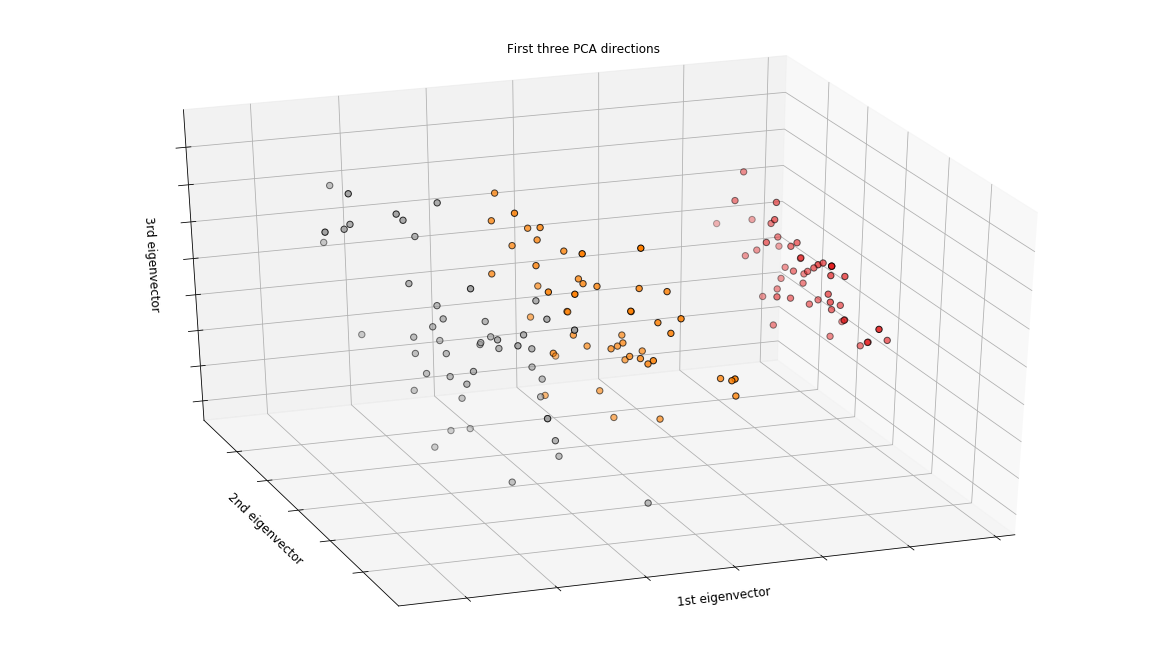

The number of features in the new subspace is  3


In [15]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

fig = plt.figure(1, figsize=(16, 9))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(X_scaled)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()
print("The number of features in the new subspace is ", X_reduced.shape[1])

## 10. Splitting the dataset into the Training set and Test set
<a id = Section10></a>
The train test split function is for splitting a single dataset for two different purposes: training and testing. The testing subset is for building your model. The testing subset is for using the model on unknown data to evaluate the performance of the model.

The data we use is usually split into training data and test data.

__Training Dataset:__ The sample of data used to fit the model.
__Validation Dataset:__ The sample of data used to provide an unbiased evaluation of a model fit on the training dataset while tuning model hyperparameters. The evaluation becomes more biased as skill on the validation dataset is incorporated into the model configuration.
__Test Dataset:__ The sample of data used to provide an unbiased evaluation of a final model fit on the training dataset.


In [16]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size = 0.20, random_state = 82)

## 11. Building the Model - Support Vector Machine
<a id = Section11></a>

A support vector machine (SVM) is a type of supervised machine learning classification algorithm. SVMs were introduced initially in 1960s and were later refined in 1990s. However, it is only now that they are becoming extremely popular, owing to their ability to achieve brilliant results. SVMs are implemented in a unique way when compared to other machine learning algorithms.

<img src="images/svm.jpg">

Support Vector Machine (SVM) is a supervised machine learning algorithm capable of performing classification, regression and even outlier detection. The linear SVM classifier works by drawing a straight line between two classes. All the data points that fall on one side of the line will be labeled as one class and all the points that fall on the other side will be labeled as the second. Sounds simple enough, but there’s an infinite amount of lines to choose from. How do we know which line will do the best job of classifying the data? This is where the LSVM algorithm comes in to play. The LSVM algorithm will select a line that not only separates the two classes but stays as far away from the closest samples as possible. In fact, the “support vector” in “support vector machine” refers to two position vectors drawn from the origin to the points which dictate the decision boundary.

<img src="images/svm.png">

### 11.1 Using Linear Kernel
<a id = Section111></a>

In [17]:
# Fitting SVC Classification to the Training set with linear kernel
from sklearn.svm import SVC
svcclassifier = SVC(kernel = 'linear', random_state = 0)
svcclassifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = svcclassifier.predict(X_test)
kernelLinearAccuracy = metrics(y_test, y_pred)

See the the below actual and predicted value side by side,
actual value on the left side and predicted value on the right hand side.

Printing the top 5 values:

[[2 2]
 [2 2]
 [0 0]
 [0 0]
 [0 0]]


[[11  0  0]
 [ 0  8  1]
 [ 0  0 10]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.89      0.94         9
           2       0.91      1.00      0.95        10

   micro avg       0.97      0.97      0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30

Correct predictions:  29
False predictions 1
Accuracy of the SVC Clasification is:  0.9666666666666667


### 11.2 Using Polynomial kernel
<a id = Section112></a>

In [18]:
# Fitting SVC Classification to the Training set with linear kernel
from sklearn.svm import SVC
svcclassifier = SVC(kernel = 'poly', random_state = 0)
svcclassifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = svcclassifier.predict(X_test)
kernelPolyAccuracy = metrics(y_test, y_pred)

See the the below actual and predicted value side by side,
actual value on the left side and predicted value on the right hand side.

Printing the top 5 values:

[[2 2]
 [2 2]
 [0 0]
 [0 0]
 [0 0]]


[[11  0  0]
 [ 0  9  0]
 [ 0  2  8]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.82      1.00      0.90         9
           2       1.00      0.80      0.89        10

   micro avg       0.93      0.93      0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.95      0.93      0.93        30

Correct predictions:  28
False predictions 2
Accuracy of the SVC Clasification is:  0.9333333333333333


### 11.3 Using RBF kernel
<a id = Section113></a>

In [19]:
# Fitting SVC Classification to the Training set with linear kernel
from sklearn.svm import SVC
svcclassifier = SVC(kernel = 'rbf', random_state = 0)
svcclassifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = svcclassifier.predict(X_test)
kernelRbfAccuracy = metrics(y_test, y_pred)

See the the below actual and predicted value side by side,
actual value on the left side and predicted value on the right hand side.

Printing the top 5 values:

[[2 2]
 [2 2]
 [0 0]
 [0 0]
 [0 0]]


[[11  0  0]
 [ 0  8  1]
 [ 0  1  9]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.89      0.89      0.89         9
           2       0.90      0.90      0.90        10

   micro avg       0.93      0.93      0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

Correct predictions:  28
False predictions 2
Accuracy of the SVC Clasification is:  0.9333333333333333


### 11.4 Using Sigmoid kernel
<a id = Section114></a>

In [20]:
# Fitting SVC Classification to the Training set with linear kernel
from sklearn.svm import SVC
svcclassifier = SVC(kernel = 'sigmoid', random_state = 0)
svcclassifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = svcclassifier.predict(X_test)
kernelSigmoidAccuracy = metrics(y_test, y_pred)

See the the below actual and predicted value side by side,
actual value on the left side and predicted value on the right hand side.

Printing the top 5 values:

[[2 2]
 [2 2]
 [0 0]
 [0 0]
 [0 0]]


[[11  0  0]
 [ 0  4  5]
 [ 0  1  9]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.80      0.44      0.57         9
           2       0.64      0.90      0.75        10

   micro avg       0.80      0.80      0.80        30
   macro avg       0.81      0.78      0.77        30
weighted avg       0.82      0.80      0.79        30

Correct predictions:  24
False predictions 6
Accuracy of the SVC Clasification is:  0.8


## 12. Accuracy of SVC classfication with different kernels
<a id = Section12></a>

In [21]:
print('Accuracy of the SVC Clasification with Linear kernel and no other adjust is:\t\t', kernelLinearAccuracy)
print('Accuracy of the SVC Clasification with Polynomial kernel and no other adjust is:\t', kernelPolyAccuracy)
print('Accuracy of the SVC Clasification with Radial Basis kernel and no other adjust is:\t', kernelRbfAccuracy)
print('Accuracy of the SVC Clasification with Sigmoid kernel and no other adjust is:\t\t', kernelSigmoidAccuracy)

Accuracy of the SVC Clasification with Linear kernel and no other adjust is:		 0.9666666666666667
Accuracy of the SVC Clasification with Polynomial kernel and no other adjust is:	 0.9333333333333333
Accuracy of the SVC Clasification with Radial Basis kernel and no other adjust is:	 0.9333333333333333
Accuracy of the SVC Clasification with Sigmoid kernel and no other adjust is:		 0.8
